In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
N = 60

mu1 = 0
mu2 = 0
cov = 10
sd1 = 100
sd2 = 100

mean = np.array([mu1, mu2])
covmatrix = np.array([[sd1 * sd1, cov], [cov, sd2 * sd2]])

data = np.random.multivariate_normal(mean, covmatrix, N)

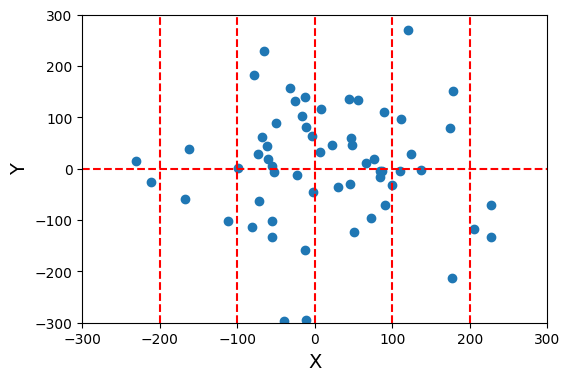

In [163]:
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)

ax.set_ylim([mu2 - 3 * sd2, mu2 + 3 * sd2])
ax.set_ylabel("Y", fontsize = 14)
ax.axhline(mu2, ls = "--", color = "red")

ax.set_xlim([mu1 - 3 * sd1, mu1 + 3 * sd1])
ax.set_xlabel("X", fontsize = 14)
ax.axvline(mu1, ls = "--", color = "red")
ax.axvline(mu1-sd1, ls = "--", color = "red")
ax.axvline(mu1-2 * sd1, ls = "--", color = "red")
ax.axvline(mu1+sd1, ls = "--", color = "red")
ax.axvline(mu1+2 * sd1, ls = "--", color = "red")

plt.scatter(data[:,0], data[:,1])

In [164]:
N1 = len(data[np.where(data[:,1] < mu2), 1][0])
df1 = pd.DataFrame(data = [[N1, N - N1, N]],
                  index = ['Y上のプロット数'],
                  columns = ['区間1', '区間2', '総プロット数']
                  )
print(df1)

          区間1  区間2  総プロット数
Y上のプロット数   28   32      60


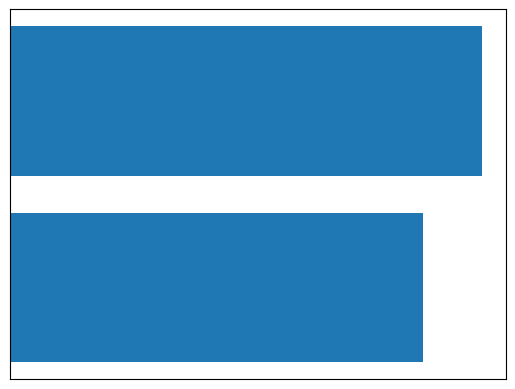

In [165]:
data[:,1] = np.where(data[:, 1] < mu2, (mu2 - 3 * sd2) / 2, (mu2 + 3 * sd2) / 2)
plt.hist(data[:,1],
         bins=2, rwidth = 0.8, orientation="horizontal")
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(bottom=False, left=False, right=False, top=False)

plt.show()

In [166]:
N2 = [
    len(data[np.where(data[:,0] < mu1-2 * sd1), 1][0]),
    len(data[np.where((data[:,0] >= mu1-2 * sd1) & (data[:,0] < mu1-sd1)), 1][0]),
    len(data[np.where((data[:,0] < mu1) & (data[:,0] >= mu1-sd1)), 1][0]),
    len(data[np.where((data[:,0] >= mu1) & (data[:,0] < mu1+sd1)), 1][0]),
    len(data[np.where((data[:,0] < mu1+2 * sd1) & (data[:,0] >= mu1+sd1)), 1][0]),
    len(data[np.where(data[:,0] >= mu1+2 * sd1), 1][0])
        ]
df2 = pd.DataFrame(data = [[N2[0], N2[1], N2[2], N2[3], N2[4], N2[5], sum(N2)]],
                  index = ['X上のプロット数'],
                  columns = ['区間1', '区間2', '区間3', '区間4', '区間5', '区間6', '総プロット数']
                  )
print(df2)

          区間1  区間2  区間3  区間4  区間5  区間6  総プロット数
X上のプロット数    2    3   25   19    8    3      60


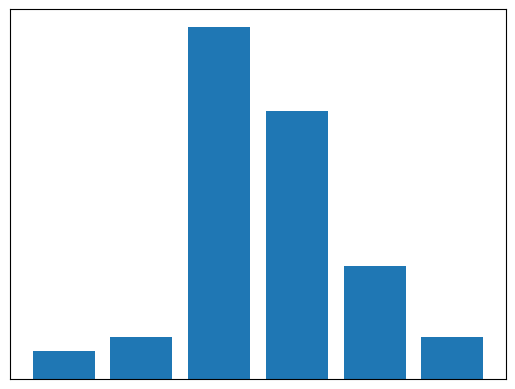

In [167]:
data[:, 0] = np.where(data[:, 0] < mu1-2 * sd1, mu1 - 2*sd1 - sd1/2, data[:, 0])
data[:, 0] = np.where((data[:, 0] >= mu1-2 * sd1) & (data[:,0] < mu1-sd1), ((mu1-2 * sd1) + (mu1-sd1))/2, data[:, 0])
data[:, 0] = np.where((data[:, 0] < mu1) & (data[:, 0] >= mu1-sd1), ((mu1) + (mu1-sd1))/2, data[:, 0]) 
data[:, 0] = np.where((data[:, 0] >= mu1) & (data[:,0] < mu1+sd1), ((mu1) + (mu1+sd1))/2, data[:, 0]) 
data[:, 0] = np.where((data[:, 0] >= mu1 +sd1) & (data[:,0] < mu1+2*sd1), ((mu1+sd1) + (mu1+2*sd1))/2, data[:, 0]) 
data[:, 0] = np.where(data[:, 0] >= mu1+2 * sd1, mu1 + 2*sd1 + sd1/2, data[:, 0]) 

plt.hist(data[:, 0], bins=6, rwidth = 0.8)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(bottom=False, left=False, right=False, top=False)

plt.show()

                  区間1  区間2  区間3  区間4  区間5  区間6  総プロット数(=Yの区間1のプロット数)
X|Y=(区間1)上のプロット数    1    2   10    9    3    3                    28


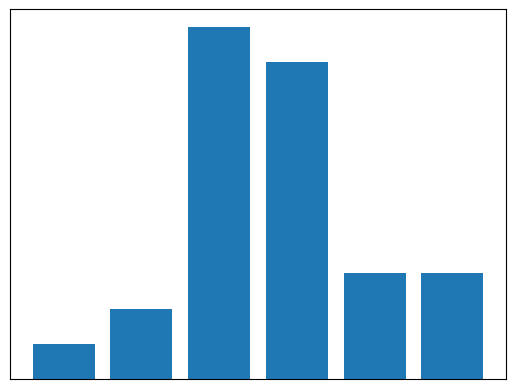

In [168]:
data3 = data[np.where(data[:,1]<mu2), 0]

N3 = [
    len(data3[np.where(data3 < mu1-2 * sd1)]),
    len(data3[np.where((data3 >= mu1-2 * sd1) & (data3 < mu1-sd1))]),
    len(data3[np.where((data3 < mu1) & (data3 >= mu1-sd1))]),
    len(data3[np.where((data3 >= mu1) & (data3 < mu1+sd1))]),
    len(data3[np.where((data3 < mu1+2 * sd1) & (data3 >= mu1+sd1))]),
    len(data3[np.where(data3 >= mu1+2 * sd1)])
        ]

df3 = pd.DataFrame(data = [[N3[0], N3[1], N3[2], N3[3], N3[4], N3[5], sum(N3)]],
                  index = ['X|Y=(区間1)上のプロット数'],
                  columns = ['区間1', '区間2', '区間3', '区間4', '区間5', '区間6', '総プロット数(=Yの区間1のプロット数)']
                  )
print(df3)

plt.hist(data3[0], bins=6, rwidth = 0.8)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(bottom=False, left=False, right=False, top=False)